In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
file_path = 'E:\\tmp\\top300_20_23\\top300_20_23_1681699961594.txt'
chunk_size = 10_000  # ÊØè‰∏™ÂàÜÂùóÁöÑË°åÊï∞

# ‰ΩøÁî®Ëø≠‰ª£Âô®ÂàÜÂùóËØªÂèñÊñá‰ª∂
iterator = pd.read_csv(file_path, chunksize=chunk_size)

# ÂàùÂßãÂåñÁ©∫Â≠óÂÖ∏ÔºåÁî®‰∫éËÆ∞ÂΩïÊØè‰∏™repo_idÁöÑÊúÄÊó©ÂíåÊúÄÂêéÁöÑËÆ∞ÂΩï
repo_records = {}

# Â§ÑÁêÜÊØè‰∏™ÂàÜÂùóÁöÑÊï∞ÊçÆ
for chunk in iterator:
    # Âú®ËøôÈáåËøõË°å‰Ω†ÊÉ≥Ë¶ÅÁöÑÂ§ÑÁêÜÊìç‰Ωú
    # ‰æãÂ¶ÇÔºåÂèØ‰ª•ÂØπÊØè‰∏™ÂàÜÂùóÁöÑÊï∞ÊçÆËøõË°åÂàÜÊûê„ÄÅËΩ¨Êç¢Á≠â

    # ÈÅçÂéÜÊØèË°åÊï∞ÊçÆ
    for _, row in chunk.iterrows():
        repo_id = row['repo_id']
        created_at = row['created_at']
        
        # Â¶ÇÊûúrepo_idÂ∑≤ÁªèÂú®Â≠óÂÖ∏‰∏≠Â≠òÂú®ÔºåÊõ¥Êñ∞ÊúÄÊó©ÂíåÊúÄÂêéÁöÑËÆ∞ÂΩï
        if repo_id in repo_records:
            repo_record = repo_records[repo_id]
            
            # Êõ¥Êñ∞repo_languageÔºåÂ¶ÇÊûúÂΩìÂâçËÆ∞ÂΩïÁöÑrepo_language‰∏ç‰∏∫Á©∫‰∏î‰πãÂâçÁöÑËÆ∞ÂΩï‰∏∫Áº∫Â§±ÂÄº
            if pd.isnull(repo_record['repo_language']) and row['repo_language'] != '':
                repo_record['repo_language'] = row['repo_language']
            
            # Êõ¥Êñ∞repo_descriptionÔºåÂ¶ÇÊûúÂΩìÂâçËÆ∞ÂΩïÁöÑrepo_description‰∏ç‰∏∫Á©∫‰∏î‰πãÂâçÁöÑËÆ∞ÂΩï‰∏∫Áº∫Â§±ÂÄº
            if pd.isnull(repo_record['repo_description']) and row['repo_description'] != '':
                repo_record['repo_description'] = row['repo_description']

            # Êõ¥Êñ∞ÊúÄÊó©ÁöÑËÆ∞ÂΩï
            if created_at < repo_record['created_at_first']:
                repo_record['created_at_first'] = created_at
            
            # Êõ¥Êñ∞ÊúÄÂêéÁöÑËÆ∞ÂΩï
            if created_at > repo_record['created_at_last']:
                repo_record['created_at_last'] = created_at
        else:
            # Ê∑ªÂä†Êñ∞ÁöÑrepo_idËÆ∞ÂΩïÂà∞Â≠óÂÖ∏‰∏≠
            repo_records[repo_id] = {'created_at_first': created_at,
                                     'created_at_last': created_at,
                                     'repo_name': row['repo_name'],
                                     'repo_language': row['repo_language'],
                                     'repo_description': row['repo_description']}
# Â∞ÜÂ≠óÂÖ∏ËΩ¨Êç¢‰∏∫DataFrame
repo_records_df = pd.DataFrame.from_dict(repo_records, orient='index').reset_index()
repo_records_df.columns = ['repo_id', 'created_at_first', 'created_at_last', 'repo_name', 'repo_language', 'repo_description']

# ËæìÂá∫ÊúÄÁªàÁöÑrepo_records DataFrame
print(repo_records_df)


C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,87,89) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,13,19,23,35,42,45,48,51,55,61,62,87,89,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,13,19,23,35,87,89) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62) have mixed types. Specify dtype option 

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,13,19,23,35,42,45,48,51,55,61,62,81,82,87,89) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,87,89,91,92,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (70,73,81,82) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,51,61,62,94,96,97) have mixed types. Specify dtype opti

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,42,45,48,51,55,61,62,87,89,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,81,82,87,89,91,92,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,55,61,62,81,82,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (81,82,91,92,94,96,97) have mixed types. Specify dtype option on import 

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,45,81,82,87,89,91,92,103,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,70,73,81,82,87,89,94,96,97,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,70,73,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,13,19,23,35,42,45,48,51,55,6

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,45,81,82) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,42,45,48,51,55,61,62,70,73,81,82,91,92,94,96,97,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,45,70,73,81,82,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,42,45,48,51,55,61,62,70,73,81,82) have mixed types. Specify dtype 

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (45,81,82,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,45,70,73,81,82,87,89,91,92,94,96,97,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (70,73,81,82,87,89,91,92,94,96,97) have mixed types. Specify dtype option on import or set low_m

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,42,48,51,55,61,62,81,82,87,89,94,96,97,126) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (87,89,91,92,94,96,97,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,42,48,51,55,61,62,81,82,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (45,106,107,108,111,116) have mixed types. Specify 

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (70,73,81,82,87,89,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (70,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (45,81,82,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,13,19,23,42,45,48,51,55,61,62,70,73,94,96,97,126) have mixed types. Specify dtype option on impo

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (70,73,81,82,87,89,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (91,92,94,96,97,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,91,92,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,87,89,91,92,103) have mixed types. Specify dtype option on import or set low_memory=

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,81,82,87,89,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (81,82,87,89) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (81,82,87,89,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,70,73,87,89,91,92,106,107,108,111,116) have mixed types. Specify dtype option on import

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (45,70,73,81,82,91,92,94,96,97,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,51,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,70,73,81,82,91,92,94,96,97,103,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (81,82,94,96,97,103) have mixe

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,48,51,55,61,62,70,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,45,70,73,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,45,48,51,55,61,70,73,81,82,87,89,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,35,45,48,51,55,61,70,73,81,82,87,89,94,96,97)

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,70,73,87,89,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,42,48,51,55,61,62,70,73,87,89) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,35,42,48,51,55,61,62,70,73,87,89) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,42,48,51,55,61,62,81,82,87,89,91,92,94,96,97,106,

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,94,96,97,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,13,19,23,35,42,45,48,51,55,61,62,94,96,97,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (45,81,82,94,96,97,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,35,42,48,51,55,61,62,70,73,81,82,87,89,126,129) 

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,45,70,73,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,45,70,73,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,13,19,23,42,45,48,51,55,61,62,70,73,94,96,97,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,70,73,81,82,91,92) have mixed types. Specify dtype option

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,42,48,51,55,61,62,81,82) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (45,94,96,97,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,45,81,82,87,89,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,81,82,87,89) have mixed types. Specify dtype option on import or set low_mem

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,70,73,91,92,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,81,82,87,89,94,96) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,51,55,61,62,87,89,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,87,89,91,92,94,96,97,126) have mixed types. Specify dtype option

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,94,96,97,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,70,73,91,92,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,70,73,81,82,87,89,91,92,94,96,97,103,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,48,51,55,61,62,70,73,81,82,91,92,94,96,97,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,48,51,55,61,62,87,89,91,92,94,96,97,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,48,51,55,61,62,70,73,81,82,103,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,45,81,8

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (45,48,70,73,91,92,94,96,97,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (70,73,87,89,91,92,94,96,97,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,70,73,87,89,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,48,70,73,87,89) have mixed types. Specify dtype option on import

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,35,42,45,48,51,55,61,62,70,73,81,82,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (45,70,73,106,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (62,81,82,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,42,45,48,51,55,61,62,81,82,106,107,108,111,1

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,70,73,81,82,87,89,94,96,97,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,42,45,48,51,55,61,62,70,73,81,82,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,42,45,48,51,55,61,62,91,92,94,96,97,126) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (45,48,61,81,82) hav

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (70,73,81,82,94,96,97,106,107,108,111,116,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,91,92,94,96,97,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,70,73,81,82,87,89,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,42,45,48,51,55,61,62,87

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,51,55,61,62,81,82,87,89,91,92,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,70,73,87,89,91,92,94,96,97,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,35,81,82,87,89,91,92,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,45,70,73,81,82,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (55,81,82,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,48,51,55,61,62,81,82,87,89,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,13,19,23,42,45,48,51,55,61,62,81,82) have mixed types. Specify

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,35,48,51,55,61,81,82,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,48,51,55,61,62,91,92,94,96,97,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,13,19,23,35,42,45,48,51,55,61,62,70,73,81,82,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,42,45,48,51,55,61,62

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,51,55,61,62,70,73,81,82,94,96,97,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,45,81,82,94,96,97,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (81,82,87,89,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (70,73,94,96,97) have mixed types. Specify dtype

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,81,82,87,89,106,107,108,111,116,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,51,55,61,62,87,89,91,92,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,81,82,91,92,94,96,97) have mixed types. Specif

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,45,70,73,81,82,87,89,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (70,73,81,82,87,89,94,96,97,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,87,89,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,35,42,45,48,51,55,6

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (45,70,73,81,82,94,96,97,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (45,48,70,73,81,82,87,89,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,51,55,61,62,81,82,87,89,91,92,94,96,97,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,35,45,48) have mixed types. Specify dtype optio

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (45,48,61,70,73,81,82,87,89,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,81,82,87,89,94,96,97,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (48,70,73,81,82,87,89) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,42,45,48,51,55,61,62,91,92,94,96,97,103) have

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,13,19,23,35,81,82,91,92,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,42,45,51,55,61,62,87,89,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,42,45,48,51,55,61,62,70,73,81,82,87,89,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (103,106,107,108,111,116) have mixed type

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,91,92,103,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,70,73,81,82,94,96,97,103,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,48,70,73,81,82,91,92,103) have mixed typ

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (45,70,73,81,82,87,89,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (70,73,81,82,94,96,97,103,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,87,89,94,96,97,103,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,70,73,103,106,107

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,45,61,70,73,87,89) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,94,96) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,19,23,35,42,45,48,51,55,61,62,70,73,87,89,94,96,97,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,19,23,42,48,51,55,61,62,91,92,94,96,97,126,129)

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,35,42,51,55,62,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (45,61,70,73,81,82,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,70,73,91,92,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,35,45,48,51,55,61,87,89) have mixed types. Specify dtype option on import or set low_memor

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,42,45,48,51,55,61,62,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,91,92,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (45,70,73,87,89,103,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,13,19,23,35,42,45,48,51,55,61,62,70,73,106,107,108,111) have mixed typ

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,70,73,91,92,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (70,73,87,89,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,61,70,73,87,89,91,92,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,13,19,23,42,48,51,55,61,62,70,73,81,82,107,108,111

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,35,45,48,61,70,73,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,48,51,55,61,62,70,73,91,92,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,13,19,23,35,42,48,51,55,61,62,70,73,81,82,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,70,73,81,82,87,89,126,12

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (70,73,81,82,103,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (81,82,87,89,103,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,42,45,48,51,55,61,62,81,82,87,89,103,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,81,82,87,89,91,92,94,96,9

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,13,19,23,35,42,45,48,51,55,61,62,70,73,81,82,91,92,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,13,19,23,35,42,45,48,51,55,61,62,70,73,81,82,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,35,45,48,51,55,61,81,82,94,96,97,126) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,35,45,48,70,73,81,82,87,89,94,96,97,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,45,48,81,82,87,89,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (70,73,81,82,106,107,108,111) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (48,70,73,81,82,106,107,108,111,116) have mixed t

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,81,82,87,89,91,92,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,45,48,70,73,87,89) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,35,42,45,48,51,55,61,62,70,73,87,89) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (8,23,42,45,48,51,55,61,62,70,73,81,82,91,92,103) have mix

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,70,73,81,82,87,89,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (45,48,61,70,73,94,96,97,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,48,81,82,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,42,48,51,55,61,81,82,87,89,91,92) have mixed types. Spec

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,13,19,23,42,48,51,55,61,62,81,82,91,92,94,96,97,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,45,48,70,73,81,82,94,96,97,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,45,48,70,73,81,82,87,89) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,81,82,87,

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,87,89,91,92,94,96,97,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,19,23,35,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,19,23,42,48,51,55,61,62,70,73,81,82,91,92,94,96,97,106,107,108,111,116,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,55,81,82) have 

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (81,82,94,96,97,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,70,73,94,96,97,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (45,81,82,106,107,108,111) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,48,51,55,62,87,89,91,92) have mixed types. Specify dt

       repo_id     created_at_first      created_at_last  \
0         8514  2020-01-01 09:29:36  2023-03-31 23:44:55   
1       156018  2020-07-07 17:23:42  2023-03-31 23:28:47   
2       302322  2020-01-01 08:16:09  2023-03-31 23:46:29   
3       458058  2020-01-01 14:08:35  2023-03-31 23:55:27   
4       507775  2020-01-01 09:49:44  2023-03-31 23:37:55   
5       576201  2020-01-01 10:15:09  2023-03-31 23:13:36   
6       724712  2020-01-01 08:00:09  2023-03-31 23:53:33   
7       843222  2020-01-01 08:10:20  2023-03-31 23:57:35   
8       858127  2020-01-01 08:19:58  2023-03-31 23:56:41   
9       873328  2020-01-01 08:06:48  2023-03-31 23:58:22   
10     1147463  2020-01-01 08:54:07  2023-03-31 23:56:05   
11     1181927  2020-01-01 10:15:50  2023-03-31 23:54:58   
12     1217614  2020-01-01 08:00:07  2023-03-31 23:54:06   
13     1385122  2020-01-01 10:17:01  2023-03-31 23:27:39   
14     1460385  2020-01-01 14:58:37  2023-03-31 22:54:52   
15     1644196  2020-01-01 08:48:28  202

In [5]:
repo_records_df

repo_id     created_at_first      created_at_last  \
0         8514  2020-01-01 09:29:36  2023-03-31 23:44:55   
1       156018  2020-07-07 17:23:42  2023-03-31 23:28:47   
2       302322  2020-01-01 08:16:09  2023-03-31 23:46:29   
3       458058  2020-01-01 14:08:35  2023-03-31 23:55:27   
4       507775  2020-01-01 09:49:44  2023-03-31 23:37:55   
5       576201  2020-01-01 10:15:09  2023-03-31 23:13:36   
6       724712  2020-01-01 08:00:09  2023-03-31 23:53:33   
7       843222  2020-01-01 08:10:20  2023-03-31 23:57:35   
8       858127  2020-01-01 08:19:58  2023-03-31 23:56:41   
9       873328  2020-01-01 08:06:48  2023-03-31 23:58:22   
10     1147463  2020-01-01 08:54:07  2023-03-31 23:56:05   
11     1181927  2020-01-01 10:15:50  2023-03-31 23:54:58   
12     1217614  2020-01-01 08:00:07  2023-03-31 23:54:06   
13     1385122  2020-01-01 10:17:01  2023-03-31 23:27:39   
14     1460385  2020-01-01 14:58:37  2023-03-31 22:54:52   
15     1644196  2020-01-01 08:48:28  2023-03-31 23:57:31   
16     1690480  2020-01-01 08:14:13  2023-03-31 23:59:54   
17     1903522  2020-01-01 16:42:32  2023-03-31 23:34:33   
18     1924147  2020-01-01 10:05:11  2023-03-31 22:41:43   
19     2179920  2020-01-01 21:35:57  2023-03-31 23:59:28   
20     2200856  2020-01-01 08:31:01  2023-03-31 23:49:09   
21     2293158  2020-01-01 13:27:54  2023-03-31 23:26:12   
22     2310495  2020-01-01 09:09:06  2023-03-31 23:52:57   
23     2464908  2020-01-01 09:55:57  2023-03-31 23:57:42   
24     2884111  2020-01-01 08:14:08  2023-03-31 23:59:47   
25     2928944  2020-01-01 08:17:10  2023-03-31 23:38:21   
26     2928948  2020-01-01 08:14:49  2023-03-31 23:11:14   
27     3234987  2020-01-01 08:15:54  2023-03-31 23:59:48   
28     3351871  2020-01-01 09:42:38  2023-03-31 23:21:07   
29     3623050  2020-01-01 08:01:55  2023-03-31 23:53:12   
..         ...                  ...                  ...   
272  283046497  2020-09-19 12:04:57  2023-03-31 23:54:41   
273  284871753  2020-09-05 01:40:06  2023-03-31 22:35:26   
274  285902689  2021-07-20 09:38:25  2023-03-31 23:58:07   
275  287113304  2020-08-20 02:59:17  2023-03-31 23:55:47   
276  292673424  2020-09-16 11:19:33  2023-03-31 23:58:12   
277  294546561  2020-11-12 04:03:07  2023-03-31 22:28:03   
278  295774370  2020-09-15 23:42:30  2023-03-31 23:39:53   
279  304344049  2021-03-12 07:03:01  2023-03-31 23:33:31   
280  307260205  2021-02-24 23:22:25  2023-03-31 23:36:40   
281  307489284  2021-11-22 23:33:03  2023-03-31 23:38:19   
282  310632133  2020-11-06 23:19:28  2023-03-31 03:54:06   
283  319742187  2020-12-09 03:38:25  2023-03-31 22:50:09   
284  330914717  2022-01-11 00:16:54  2023-03-31 23:55:30   
285  348822769  2021-10-12 22:01:09  2023-03-31 04:33:52   
286  354743391  2021-07-07 00:12:30  2023-03-31 23:57:47   
287  359227401  2021-04-25 11:32:01  2023-03-31 23:26:23   
288  364319186  2021-05-17 16:57:36  2023-03-31 23:44:41   
289  368199998  2021-05-17 21:41:50  2023-03-31 21:44:47   
290  368288588  2021-05-18 02:56:33  2023-03-31 04:46:06   
291  383940088  2021-07-08 09:17:16  2023-03-31 21:57:25   
292  399567620  2022-04-01 05:31:22  2023-03-21 22:22:43   
293  408858330  2021-10-13 20:37:54  2023-03-31 23:32:45   
294  408894306  2021-09-22 00:29:49  2023-03-31 23:59:47   
295  450258305  2022-01-25 03:14:22  2023-03-29 17:33:44   
296  457498892  2022-03-23 03:11:37  2023-03-26 21:32:12   
297  462096007  2022-03-26 15:53:52  2023-02-28 22:51:26   
298  480480380  2022-05-03 01:17:02  2023-03-27 22:38:03   
299  499184667  2022-07-07 02:53:07  2023-03-31 21:34:24   
300  516657210  2022-07-22 15:41:50  2023-03-31 23:58:58   
301  527591471  2022-08-22 22:05:28  2023-03-31 23:57:28   

                                         repo_name     repo_language  \
0                                      rails/rails              Ruby   
1                                      redis/redis                 C   
2                                    gradle/gradle            Groovy  

In [6]:
repo_records_df[repo_records_df['repo_language'].isnull()==False]

repo_id     created_at_first      created_at_last  \
0         8514  2020-01-01 09:29:36  2023-03-31 23:44:55   
1       156018  2020-07-07 17:23:42  2023-03-31 23:28:47   
2       302322  2020-01-01 08:16:09  2023-03-31 23:46:29   
3       458058  2020-01-01 14:08:35  2023-03-31 23:55:27   
4       507775  2020-01-01 09:49:44  2023-03-31 23:37:55   
5       576201  2020-01-01 10:15:09  2023-03-31 23:13:36   
6       724712  2020-01-01 08:00:09  2023-03-31 23:53:33   
7       843222  2020-01-01 08:10:20  2023-03-31 23:57:35   
8       858127  2020-01-01 08:19:58  2023-03-31 23:56:41   
9       873328  2020-01-01 08:06:48  2023-03-31 23:58:22   
10     1147463  2020-01-01 08:54:07  2023-03-31 23:56:05   
11     1181927  2020-01-01 10:15:50  2023-03-31 23:54:58   
12     1217614  2020-01-01 08:00:07  2023-03-31 23:54:06   
13     1385122  2020-01-01 10:17:01  2023-03-31 23:27:39   
14     1460385  2020-01-01 14:58:37  2023-03-31 22:54:52   
15     1644196  2020-01-01 08:48:28  2023-03-31 23:57:31   
16     1690480  2020-01-01 08:14:13  2023-03-31 23:59:54   
17     1903522  2020-01-01 16:42:32  2023-03-31 23:34:33   
19     2179920  2020-01-01 21:35:57  2023-03-31 23:59:28   
20     2200856  2020-01-01 08:31:01  2023-03-31 23:49:09   
21     2293158  2020-01-01 13:27:54  2023-03-31 23:26:12   
22     2310495  2020-01-01 09:09:06  2023-03-31 23:52:57   
23     2464908  2020-01-01 09:55:57  2023-03-31 23:57:42   
24     2884111  2020-01-01 08:14:08  2023-03-31 23:59:47   
25     2928944  2020-01-01 08:17:10  2023-03-31 23:38:21   
26     2928948  2020-01-01 08:14:49  2023-03-31 23:11:14   
27     3234987  2020-01-01 08:15:54  2023-03-31 23:59:48   
28     3351871  2020-01-01 09:42:38  2023-03-31 23:21:07   
29     3623050  2020-01-01 08:01:55  2023-03-31 23:53:12   
30     3638964  2020-01-01 08:02:59  2023-03-31 23:57:17   
..         ...                  ...                  ...   
265  264818686  2020-05-28 06:58:41  2023-03-31 23:52:36   
266  266231149  2020-05-23 08:06:07  2023-03-31 23:49:47   
267  268424739  2021-05-30 16:54:44  2023-03-31 23:57:48   
268  275993885  2020-07-10 00:14:45  2023-03-31 23:30:48   
269  281319253  2020-08-18 10:00:24  2023-03-31 23:57:10   
270  281500451  2020-07-22 04:43:56  2023-03-31 23:23:11   
271  281975310  2020-09-03 15:20:50  2023-03-31 23:33:33   
272  283046497  2020-09-19 12:04:57  2023-03-31 23:54:41   
273  284871753  2020-09-05 01:40:06  2023-03-31 22:35:26   
274  285902689  2021-07-20 09:38:25  2023-03-31 23:58:07   
275  287113304  2020-08-20 02:59:17  2023-03-31 23:55:47   
276  292673424  2020-09-16 11:19:33  2023-03-31 23:58:12   
277  294546561  2020-11-12 04:03:07  2023-03-31 22:28:03   
278  295774370  2020-09-15 23:42:30  2023-03-31 23:39:53   
279  304344049  2021-03-12 07:03:01  2023-03-31 23:33:31   
280  307260205  2021-02-24 23:22:25  2023-03-31 23:36:40   
281  307489284  2021-11-22 23:33:03  2023-03-31 23:38:19   
282  310632133  2020-11-06 23:19:28  2023-03-31 03:54:06   
283  319742187  2020-12-09 03:38:25  2023-03-31 22:50:09   
284  330914717  2022-01-11 00:16:54  2023-03-31 23:55:30   
285  348822769  2021-10-12 22:01:09  2023-03-31 04:33:52   
286  354743391  2021-07-07 00:12:30  2023-03-31 23:57:47   
289  368199998  2021-05-17 21:41:50  2023-03-31 21:44:47   
291  383940088  2021-07-08 09:17:16  2023-03-31 21:57:25   
292  399567620  2022-04-01 05:31:22  2023-03-21 22:22:43   
293  408858330  2021-10-13 20:37:54  2023-03-31 23:32:45   
297  462096007  2022-03-26 15:53:52  2023-02-28 22:51:26   
298  480480380  2022-05-03 01:17:02  2023-03-27 22:38:03   
300  516657210  2022-07-22 15:41:50  2023-03-31 23:58:58   
301  527591471  2022-08-22 22:05:28  2023-03-31 23:57:28   

                                repo_name     repo_language  \
0                             rails/rails              Ruby   
1                             redis/redis                 C   
2                           gradle/gradle            Groovy   
3                         symfony/

In [7]:
repo_records_df['repo_language'].unique()

array(['Ruby', 'C', 'Groovy', 'PHP', 'Java', 'JavaScript', 'Rust',
       'Python', 'C++', 'Julia', nan, 'C#', 'DM', 'Nix', 'TypeScript',
       'HTML', 'Rich Text Format', 'Vim script', 'Go', 'Scala', 'Kotlin',
       'Clojure', 'Dart', 'PowerShell', 'Shell', 'Zig', 'Mustache',
       'Objective-C', 'CMake', 'Tcl', 'Lean', 'CodeQL', 'Lua', 'SCSS',
       'Vue', 'Markdown', 'Haxe', 'CSS', 'Inno Setup'], dtype=object)

In [11]:
# repo_records_df.to_csv('repo_records.csv',index=False)

In [4]:
repo_records_df=pd.read_csv('repo_records.csv')
repo_records_df

repo_id     created_at_first      created_at_last  \
0         8514  2020-01-01 09:29:36  2023-03-31 23:44:55   
1       156018  2020-07-07 17:23:42  2023-03-31 23:28:47   
2       302322  2020-01-01 08:16:09  2023-03-31 23:46:29   
3       458058  2020-01-01 14:08:35  2023-03-31 23:55:27   
4       507775  2020-01-01 09:49:44  2023-03-31 23:37:55   
..         ...                  ...                  ...   
297  462096007  2022-03-26 15:53:52  2023-02-28 22:51:26   
298  480480380  2022-05-03 01:17:02  2023-03-27 22:38:03   
299  499184667  2022-07-07 02:53:07  2023-03-31 21:34:24   
300  516657210  2022-07-22 15:41:50  2023-03-31 23:58:58   
301  527591471  2022-08-22 22:05:28  2023-03-31 23:57:28   

                                repo_name repo_language  \
0                             rails/rails          Ruby   
1                             redis/redis             C   
2                           gradle/gradle        Groovy   
3                         symfony/symfony           PHP   
4                   elastic/elasticsearch          Java   
..                                    ...           ...   
297                  taozhiyu/TyProAction    Inno Setup   
298       education/GitHubGraduation-2022    JavaScript   
299          ValveSoftware/Dota2-Gameplay           NaN   
300            wjz304/Redpill_CustomBuild         Shell   
301  AUTOMATIC1111/stable-diffusion-webui        Python   

                                      repo_description  
0                                        Ruby on Rails  
1    Redis is an in-memory database that persists o...  
2                   Adaptable, fast automation for all  
3                            The Symfony PHP framework  
4    Free and Open, Distributed, RESTful Search Engine  
..                                                 ...  
297             A Github Action about Ty (Pro Version)  
298  Join the GitHub Graduation Yearbook and "walk ...  
299                       Public Bug Tracker for Dota2  
300                                      Redpill ÂÆöÂà∂ÂåñÁºñËØë  
301                            Stable Diffusion web UI  

[302 rows x 6 columns]

In [5]:
language_counts = repo_records_df['repo_language'].value_counts()
language_counts

Python              38
C++                 34
TypeScript          33
JavaScript          28
Go                  26
Java                24
C#                  14
C                   13
HTML                10
PHP                  8
Shell                7
Rust                 7
Ruby                 5
PowerShell           5
Kotlin               4
Dart                 3
Rich Text Format     2
Scala                2
DM                   2
Clojure              2
Julia                2
Markdown             2
Lean                 1
CSS                  1
Haxe                 1
Vue                  1
SCSS                 1
Lua                  1
CodeQL               1
Objective-C          1
Tcl                  1
CMake                1
Vim script           1
Mustache             1
Zig                  1
Groovy               1
Nix                  1
Inno Setup           1
Name: repo_language, dtype: int64

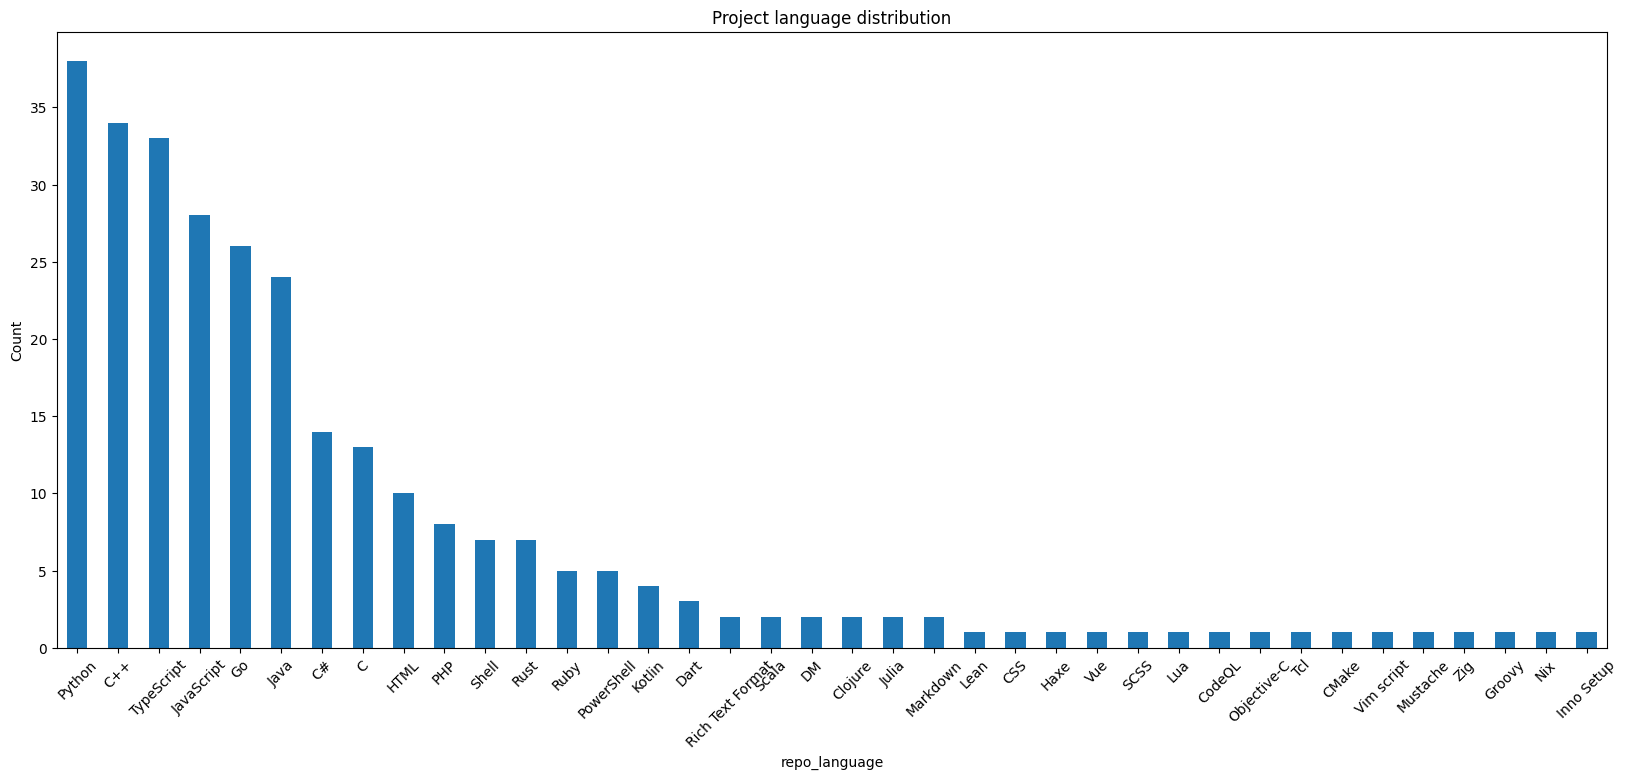

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

# ÂÅáËÆælanguage_countsÊòØÂåÖÂê´ÊØè‰∏™repo_languageÁöÑÈ°πÁõÆÊï∞ÁöÑSeries

# ÁªòÂà∂Êü±Áä∂Âõæ
plt.figure(figsize=(20, 8))
language_counts.plot(kind='bar')
plt.xlabel('repo_language')
plt.ylabel('Count')
plt.title('Project language distribution')
plt.xticks(rotation=45)
plt.show()

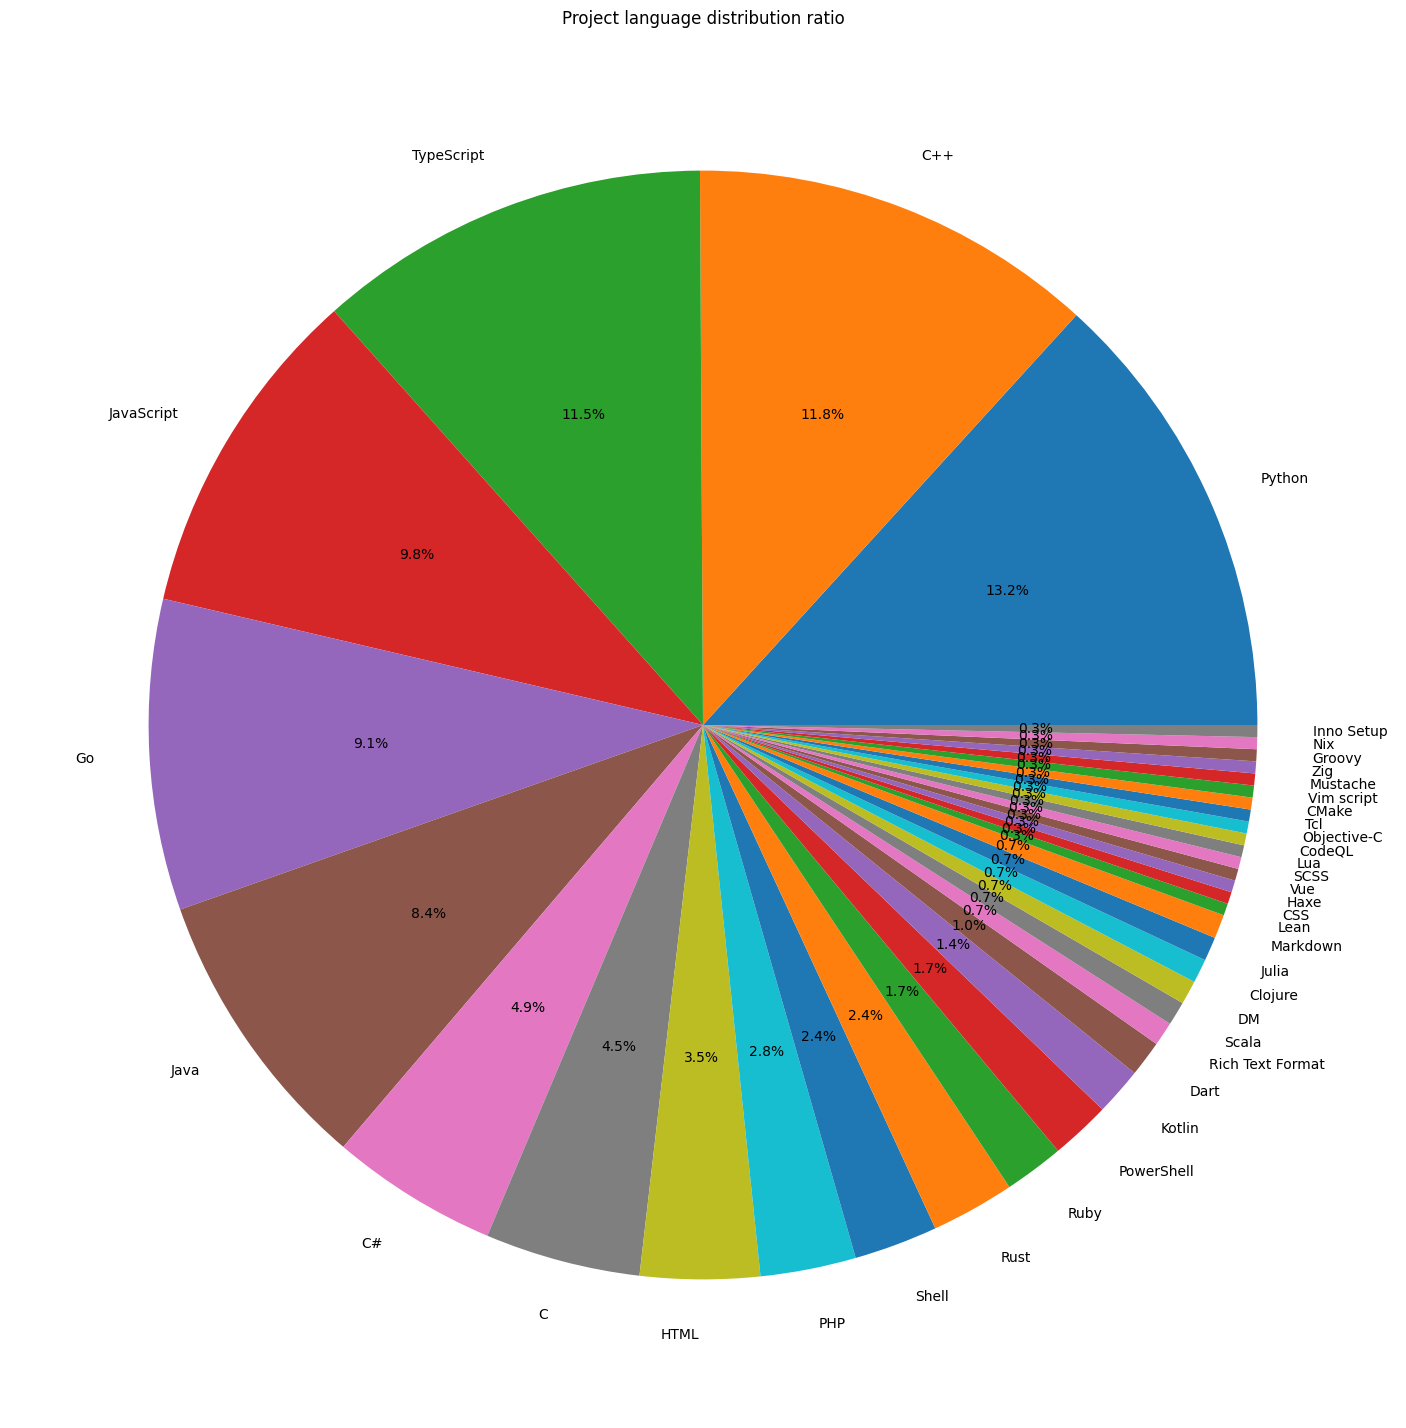

In [32]:
# ÁªòÂà∂È•ºÂõæ
plt.figure(figsize=(20, 18))
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%')
plt.title('Project language distribution ratio')
plt.show()

In [145]:
#  df['created_at_last'].max()
date_ranges
# df['repo_language'].unique()
# language_counts.index

DatetimeIndex(['2020-01-31', '2020-04-30', '2020-07-31', '2020-10-31',
               '2021-01-31', '2021-04-30', '2021-07-31', '2021-10-31',
               '2022-01-31', '2022-04-30', '2022-07-31', '2022-10-31',
               '2023-01-31'],
              dtype='datetime64[ns]', freq='3M')

In [155]:
import pandas as pd

# ÂÅáËÆædfÊòØÂåÖÂê´Â≠óÊÆµ repo_id, created_at_first, created_at_last, repo_name, repo_language ÁöÑDataFrame

# Â∞Ücreated_at_firstÂíåcreated_at_lastÂàóËΩ¨Êç¢‰∏∫Êó•ÊúüÊó∂Èó¥Á±ªÂûã
df['created_at_first'] = pd.to_datetime(df['created_at_first'])
df['created_at_last'] = pd.to_datetime(df['created_at_last'])

# ËÆæÁΩÆËµ∑ÂßãÊó•ÊúüÂíåÁªìÊùüÊó•Êúü
start_date = pd.Timestamp('2020-01-01')
# end_date =  df['created_at_last'].max()
end_date = pd.Timestamp('2023-07-30')

# ÂàõÂª∫Êó∂Èó¥ËåÉÂõ¥ÁöÑÂàóË°®
date_ranges = pd.date_range(start=start_date, end=end_date, freq='3M')

# ÂàùÂßãÂåñÂ≠òÊ¥ªÈ°πÁõÆÊï∞ÁöÑÂ≠óÂÖ∏
project_counts = {}

# ÈÅçÂéÜÊó∂Èó¥ËåÉÂõ¥
for i in range(len(date_ranges) - 1):
    start_range = date_ranges[i]
    end_range = date_ranges[i + 1]
    
    # Ê†πÊçÆÈ°πÁõÆÁöÑÂºÄÂßãÊó∂Èó¥ÂíåÁªìÊùüÊó∂Èó¥Á≠õÈÄâÂá∫Á¨¶ÂêàÊù°‰ª∂ÁöÑÈ°πÁõÆ
    mask = (df['created_at_first'] <= end_range) & (df['created_at_last'] >= start_range)
    filtered_df = df[mask]
    
    # ÁªüËÆ°ÊØè‰∏™repo_languageÁöÑÂ≠òÊ¥ªÈ°πÁõÆÊï∞
    language_counts = filtered_df['repo_language'].value_counts()
    
    # Â∞ÜÂ≠òÊ¥ªÈ°πÁõÆÊï∞Ê∑ªÂä†Âà∞Â≠óÂÖ∏‰∏≠
    for language in df['repo_language'].value_counts().index:
        count = language_counts.get(language, 0)
        if language in project_counts:
            project_counts[language].append(count)
        else:
            project_counts[language] = [count]
    

# Â∞Ü project_counts Â≠óÂÖ∏ËΩ¨Êç¢‰∏∫ DataFrame
result_df = pd.DataFrame.from_dict(project_counts, orient='index')

# ËÆæÁΩÆÂàóÂêç‰∏∫Êó•ÊúüËåÉÂõ¥
result_df.columns = date_ranges[:-1]

In [156]:
result_df

2020-01-31  2020-04-30  2020-07-31  2020-10-31  2021-01-31  \
Python                    30          32          32          34          35   
C++                       32          33          33          33          33   
TypeScript                24          26          27          29          29   
JavaScript                20          21          24          24          25   
Go                        22          23          23          25          25   
Java                      17          20          21          22          23   
C#                        12          13          14          14          14   
C                         11          13          13          13          13   
HTML                       7           7           8           9           9   
PHP                        8           8           8           8           8   
Shell                      6           6           6           6           6   
Rust                       5           5           5           5           5   
Ruby                       4           4           4           4           4   
PowerShell                 4           5           5           5           5   
Kotlin                     2           2           2           4           4   
Dart                       2           2           2           2           2   
Julia                      2           2           2           2           2   
Markdown                   0           0           1           2           2   
Rich Text Format           1           1           1           1           1   
Scala                      2           1           1           1           1   
Clojure                    1           2           2           2           2   
DM                         1           2           2           2           2   
Nix                        1           1           1           1           1   
Objective-C                1           1           1           1           1   
Groovy                     1           1           1           1           1   
Zig                        1           1           1           1           1   
Lean                       1           1           1           1           1   
SCSS                       0           0           0           1           1   
Haxe                       0           0           0           0           0   
CSS                        0           0           0           0           0   
Mustache                   1           1           1           1           1   
CMake                      1           1           1           1           1   
Lua                        0           0           1           1           1   
Inno Setup                 0           0           0           0           0   
Vim script                 1           1           1           1           1   
Vue                        0           0           1           1           1   
CodeQL                     1           1           1           1           1   
Tcl                        1           1           1           1           1   

                  2021-04-30  2021-07-31  2021-10-31  2022-01-31  2022-04-30  \
Python                    35          35          36          36          37   
C++                       34          34          34          34          34   
TypeScript                29          31          32          33          33   
JavaScript                26          26          26          27          28   
Go                        25          26          26          26          26   
Java                      23          23          23          23          24   
C#                        14          14          14          14          14   
C                         13          13          13          13          13   
HTML                       9           9           9           9           9   
PHP                        8           8           8           8           8   
Shell            

In [157]:
# result_df.to_csv('repo_language_trends',index_label='repo_language', header=True)

In [158]:
project_counts

{'C': [11, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13],
 'C#': [12, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14],
 'C++': [32, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34],
 'CMake': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'CSS': [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
 'Clojure': [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 'CodeQL': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'DM': [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 'Dart': [2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3],
 'Go': [22, 23, 23, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26],
 'Groovy': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'HTML': [7, 7, 8, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10],
 'Haxe': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
 'Inno Setup': [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
 'Java': [17, 20, 21, 22, 23, 23, 23, 23, 23, 24, 24, 24, 24],
 'JavaScript': [20, 21, 24, 24, 25, 26, 26, 26, 27, 28, 28, 28, 28],
 'Julia': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 'Kotlin': [2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
 'Lean'

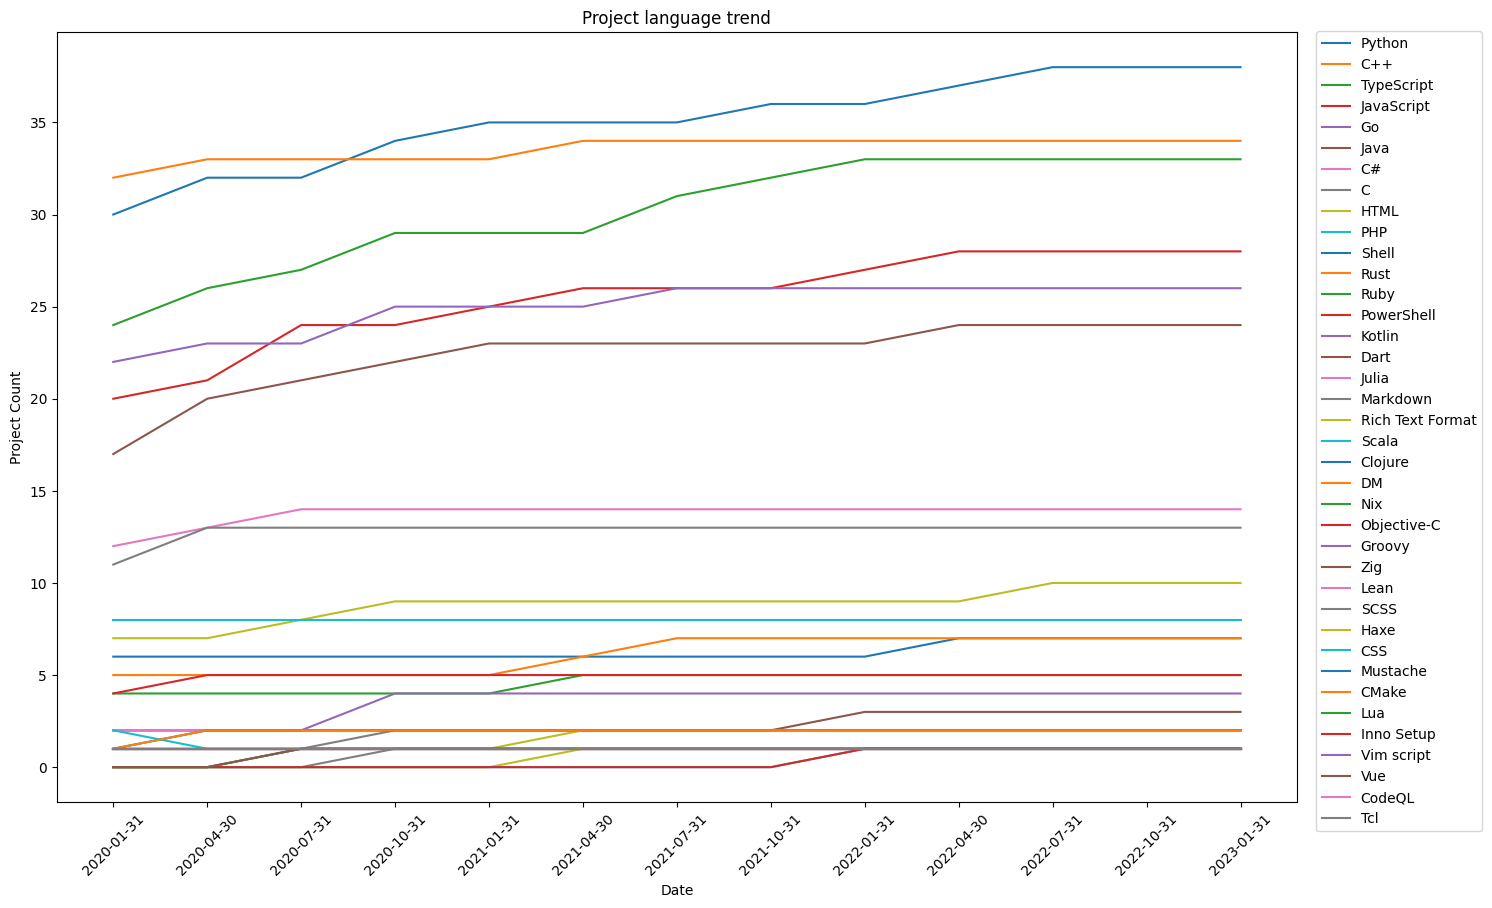

In [33]:
result_df=pd.read_csv('repo_language_trends',index_col=0)
# ËΩ¨ÁΩÆ DataFrameÔºå‰ΩøÊó•ÊúüÊàê‰∏∫ÂàóÂêç
result_df_trans = result_df.transpose()

# ÁªòÂà∂ÊäòÁ∫øÂõæ
plt.figure(figsize=(16, 10))
for language in result_df_trans.columns:
    plt.plot(result_df_trans.index, result_df_trans[language], label=language)

plt.xlabel('Date')
plt.ylabel('Project Count')
plt.title('Project language trend')
plt.legend(bbox_to_anchor=(1.01, 1.01), loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [188]:
import pandas as pd

file_path = 'E:\\tmp\\top300_20_23\\top300_20_23_1681699961594.txt'
chunk_size = 10_000  # ÊØè‰∏™ÂàÜÂùóÁöÑË°åÊï∞

# ‰ΩøÁî®Ëø≠‰ª£Âô®ÂàÜÂùóËØªÂèñÊñá‰ª∂
iterator = pd.read_csv(file_path, chunksize=chunk_size)

# ÂàùÂßãÂåñÁ©∫Â≠óÂÖ∏ÔºåÁî®‰∫éËÆ∞ÂΩïÊØè‰∏™repo_languageÁöÑÊ¥ªË∑ÉÂ∫¶
language_activity = {}

# Â§ÑÁêÜÊØè‰∏™ÂàÜÂùóÁöÑÊï∞ÊçÆ
for chunk in iterator:
    # Âú®ËøôÈáåËøõË°å‰Ω†ÊÉ≥Ë¶ÅÁöÑÂ§ÑÁêÜÊìç‰Ωú
    # ‰æãÂ¶ÇÔºåÂèØ‰ª•ÂØπÊØè‰∏™ÂàÜÂùóÁöÑÊï∞ÊçÆËøõË°åÂàÜÊûê„ÄÅËΩ¨Êç¢Á≠â

    # Â∞Ücreated_atÂàóËΩ¨Êç¢‰∏∫Êó•ÊúüÊó∂Èó¥Á±ªÂûã
    chunk['created_at'] = pd.to_datetime(chunk['created_at'])
    
    # ËÆæÁΩÆÂºÄÂßãÊó•Êúü‰∏∫2020Âπ¥1Êúà1Êó•
    start_date = pd.Timestamp('2020-01-01')
    
    # ÈÅçÂéÜÊØè‰∏™ÂàÜÂùóÁöÑÊï∞ÊçÆ
    for _, row in chunk.iterrows():
        repo_id = row['repo_id']
        created_at = row['created_at']
        
        # Ë∑≥ËøáÊó©‰∫éÂºÄÂßãÊó•ÊúüÁöÑËÆ∞ÂΩï
        if created_at < start_date:
            continue
        
        # ËÆ°ÁÆóÂΩìÂâçÊó•ÊúüÂà∞ÂºÄÂßãÊó•ÊúüÁöÑÊúà‰ªΩÂ∑Æ
        months_diff = (created_at.year - start_date.year) * 12 + (created_at.month - start_date.month)
        
        # Â∞ÜÊúà‰ªΩÂ∑ÆÈô§‰ª•3ÔºåËé∑ÂèñÂØπÂ∫îÁöÑ3‰∏™ÊúàÁöÑÁ¥¢Âºï
        quarter_index = months_diff // 3
        # Ëé∑Âèñrepo_language
        repo_language = repo_records_df[repo_records_df['repo_id']==row['repo_id']]['repo_language'].values[0]
        
        # Ê£ÄÊü•repo_languageÊòØÂê¶Â∑≤ÁªèÂú®Â≠óÂÖ∏‰∏≠Â≠òÂú®ÔºåÂ¶ÇÊûúÂ≠òÂú®ÔºåÂ¢ûÂä†ËÆ°Êï∞Âô®ÔºõÂ¶ÇÊûú‰∏çÂ≠òÂú®ÔºåÊ∑ªÂä†Êñ∞ÁöÑÈîÆÂÄºÂØπ
        if repo_language in language_activity:
            if quarter_index in language_activity[repo_language]:
                language_activity[repo_language][quarter_index] += 1
            else:
                language_activity[repo_language][quarter_index] = 1
        else:
            language_activity[repo_language] = {quarter_index: 1}

# Â∞ÜÂ≠óÂÖ∏ËΩ¨Êç¢‰∏∫DataFrame
activity_df = pd.DataFrame.from_dict(language_activity, orient='columns')

activity_df.set_index(pd.Index(date_ranges[:-1]), inplace=True)

# ËæìÂá∫Ê¥ªË∑ÉÂ∫¶DataFrame
print(activity_df)


C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,87,89) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,13,19,23,35,42,45,48,51,55,61,62,87,89,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,13,19,23,35,87,89) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62) have mixed types. Specify dtype option 

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,13,19,23,35,42,45,48,51,55,61,62,81,82,87,89) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,87,89,91,92,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (70,73,81,82) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,51,61,62,94,96,97) have mixed types. Specify dtype opti

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,42,45,48,51,55,61,62,87,89,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,81,82,87,89,91,92,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,55,61,62,81,82,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (81,82,91,92,94,96,97) have mixed types. Specify dtype option on import 

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,45,81,82,87,89,91,92,103,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,70,73,81,82,87,89,94,96,97,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,70,73,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,13,19,23,35,42,45,48,51,55,6

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,45,81,82) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,42,45,48,51,55,61,62,70,73,81,82,91,92,94,96,97,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,45,70,73,81,82,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,42,45,48,51,55,61,62,70,73,81,82) have mixed types. Specify dtype 

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (45,81,82,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,45,70,73,81,82,87,89,91,92,94,96,97,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (70,73,81,82,87,89,91,92,94,96,97) have mixed types. Specify dtype option on import or set low_m

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,42,48,51,55,61,62,81,82,87,89,94,96,97,126) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (87,89,91,92,94,96,97,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,42,48,51,55,61,62,81,82,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (45,106,107,108,111,116) have mixed types. Specify 

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (70,73,81,82,87,89,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (70,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (45,81,82,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,13,19,23,42,45,48,51,55,61,62,70,73,94,96,97,126) have mixed types. Specify dtype option on impo

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (70,73,81,82,87,89,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (91,92,94,96,97,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,91,92,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,87,89,91,92,103) have mixed types. Specify dtype option on import or set low_memory=

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,81,82,87,89,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (81,82,87,89) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (81,82,87,89,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,70,73,87,89,91,92,106,107,108,111,116) have mixed types. Specify dtype option on import

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (45,70,73,81,82,91,92,94,96,97,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,51,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,70,73,81,82,91,92,94,96,97,103,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (81,82,94,96,97,103) have mixe

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,48,51,55,61,62,70,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,45,70,73,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,45,48,51,55,61,70,73,81,82,87,89,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,35,45,48,51,55,61,70,73,81,82,87,89,94,96,97)

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,70,73,87,89,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,42,48,51,55,61,62,70,73,87,89) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,35,42,48,51,55,61,62,70,73,87,89) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,42,48,51,55,61,62,81,82,87,89,91,92,94,96,97,106,

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,94,96,97,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,13,19,23,35,42,45,48,51,55,61,62,94,96,97,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (45,81,82,94,96,97,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,35,42,48,51,55,61,62,70,73,81,82,87,89,126,129) 

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,45,70,73,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,45,70,73,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,13,19,23,42,45,48,51,55,61,62,70,73,94,96,97,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,70,73,81,82,91,92) have mixed types. Specify dtype option

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,42,48,51,55,61,62,81,82) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (45,94,96,97,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,45,81,82,87,89,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,81,82,87,89) have mixed types. Specify dtype option on import or set low_mem

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,70,73,91,92,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,81,82,87,89,94,96) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,51,55,61,62,87,89,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,87,89,91,92,94,96,97,126) have mixed types. Specify dtype option

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,94,96,97,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,70,73,91,92,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,70,73,81,82,87,89,91,92,94,96,97,103,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,48,51,55,61,62,70,73,81,82,91,92,94,96,97,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,48,51,55,61,62,87,89,91,92,94,96,97,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,48,51,55,61,62,70,73,81,82,103,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,45,81,8

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (45,48,70,73,91,92,94,96,97,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (70,73,87,89,91,92,94,96,97,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,70,73,87,89,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,48,70,73,87,89) have mixed types. Specify dtype option on import

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,35,42,45,48,51,55,61,62,70,73,81,82,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (45,70,73,106,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (62,81,82,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,42,45,48,51,55,61,62,81,82,106,107,108,111,1

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,70,73,81,82,87,89,94,96,97,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,42,45,48,51,55,61,62,70,73,81,82,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,42,45,48,51,55,61,62,91,92,94,96,97,126) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (45,48,61,81,82) hav

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (70,73,81,82,94,96,97,106,107,108,111,116,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,91,92,94,96,97,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,70,73,81,82,87,89,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,42,45,48,51,55,61,62,87

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,51,55,61,62,81,82,87,89,91,92,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,70,73,87,89,91,92,94,96,97,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,35,81,82,87,89,91,92,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,45,70,73,81,82,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (55,81,82,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,48,51,55,61,62,81,82,87,89,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,13,19,23,42,45,48,51,55,61,62,81,82) have mixed types. Specify

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,35,48,51,55,61,81,82,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,48,51,55,61,62,91,92,94,96,97,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,13,19,23,35,42,45,48,51,55,61,62,70,73,81,82,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,42,45,48,51,55,61,62

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,51,55,61,62,70,73,81,82,94,96,97,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,45,81,82,94,96,97,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (81,82,87,89,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (70,73,94,96,97) have mixed types. Specify dtype

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,81,82,87,89,106,107,108,111,116,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,51,55,61,62,87,89,91,92,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,81,82,91,92,94,96,97) have mixed types. Specif

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,45,70,73,81,82,87,89,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (70,73,81,82,87,89,94,96,97,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,87,89,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,35,42,45,48,51,55,6

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (45,70,73,81,82,94,96,97,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (45,48,70,73,81,82,87,89,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,51,55,61,62,81,82,87,89,91,92,94,96,97,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,35,45,48) have mixed types. Specify dtype optio

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (45,48,61,70,73,81,82,87,89,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,81,82,87,89,94,96,97,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (48,70,73,81,82,87,89) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,42,45,48,51,55,61,62,91,92,94,96,97,103) have

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,13,19,23,35,81,82,91,92,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,42,45,51,55,61,62,87,89,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,42,45,48,51,55,61,62,70,73,81,82,87,89,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (103,106,107,108,111,116) have mixed type

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,91,92,103,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,70,73,81,82,94,96,97,103,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,48,70,73,81,82,91,92,103) have mixed typ

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (45,70,73,81,82,87,89,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (70,73,81,82,94,96,97,103,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,87,89,94,96,97,103,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,70,73,103,106,107

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,45,61,70,73,87,89) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,94,96) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,19,23,35,42,45,48,51,55,61,62,70,73,87,89,94,96,97,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,19,23,42,48,51,55,61,62,91,92,94,96,97,126,129)

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,35,42,51,55,62,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (45,61,70,73,81,82,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,70,73,91,92,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,35,45,48,51,55,61,87,89) have mixed types. Specify dtype option on import or set low_memor

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,42,45,48,51,55,61,62,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,91,92,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (45,70,73,87,89,103,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,13,19,23,35,42,45,48,51,55,61,62,70,73,106,107,108,111) have mixed typ

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,70,73,91,92,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (70,73,87,89,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,61,70,73,87,89,91,92,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,13,19,23,42,48,51,55,61,62,70,73,81,82,107,108,111

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,35,45,48,61,70,73,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,48,51,55,61,62,70,73,91,92,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,13,19,23,35,42,48,51,55,61,62,70,73,81,82,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,70,73,81,82,87,89,126,12

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (70,73,81,82,103,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (81,82,87,89,103,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,42,45,48,51,55,61,62,81,82,87,89,103,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,81,82,87,89,91,92,94,96,9

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,13,19,23,35,42,45,48,51,55,61,62,70,73,81,82,91,92,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,13,19,23,35,42,45,48,51,55,61,62,70,73,81,82,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,35,45,48,51,55,61,81,82,94,96,97,126) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,35,45,48,70,73,81,82,87,89,94,96,97,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,45,48,81,82,87,89,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (70,73,81,82,106,107,108,111) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (48,70,73,81,82,106,107,108,111,116) have mixed t

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,81,82,87,89,91,92,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,45,48,70,73,87,89) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,35,42,45,48,51,55,61,62,70,73,87,89) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (8,23,42,45,48,51,55,61,62,70,73,81,82,91,92,103) have mix

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,70,73,81,82,87,89,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (45,48,61,70,73,94,96,97,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,48,81,82,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,42,48,51,55,61,81,82,87,89,91,92) have mixed types. Spec

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,13,19,23,42,48,51,55,61,62,81,82,91,92,94,96,97,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,45,48,70,73,81,82,94,96,97,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,45,48,70,73,81,82,87,89) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,81,82,87,

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (35,87,89,91,92,94,96,97,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,19,23,35,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,19,23,42,48,51,55,61,62,70,73,81,82,91,92,94,96,97,106,107,108,111,116,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,55,81,82) have 

C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (81,82,94,96,97,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,45,48,51,55,61,62,70,73,94,96,97,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (45,81,82,106,107,108,111) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cathy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,48,51,55,62,87,89,91,92) have mixed types. Specify dt

       C++   Python      Go  TypeScript     PHP    Java     Lua  Scala     DM  \
0   395385   318154  305383      335407   95379  143507     NaN  50121  22470   
1   473062   409334  340048      417039   94840  181726     NaN  42303  18824   
2   497146   449782  360952      421800   93571  201436  3849.0  50963  31678   
3   524923   484455  385828      463124  109264  242086  9109.0  55948  33004   
4   526042   504020  425616      503406  105858  267351  8296.0  38958  51360   
5   548707   536622  448559      513207  104768  277375  5667.0  46521  44424   
6   542931   522105  418048      468659   94180  268714  7224.0  39477  39273   
7   412714   413578  367615      387716   71560  232741  6510.0  26286  34506   
8   520140   566695  498916      503075   88248  330545  9587.0  20655  44690   
9   504958   536356  448856      501335   81128  323982  7124.0  17979  44784   
10  541873   612555  478619      506987   82921  371568  7152.0  19758  40484   
11  515772  1094711  445957 

In [193]:
language_activity

{'C': {0: 103107,
  1: 118181,
  2: 127025,
  3: 132956,
  4: 146389,
  5: 147263,
  6: 131243,
  7: 114500,
  8: 148906,
  9: 143166,
  10: 167165,
  11: 143008,
  12: 154113},
 'C#': {0: 164277,
  1: 224046,
  2: 233695,
  3: 235841,
  4: 248430,
  5: 240565,
  6: 229512,
  7: 147660,
  8: 217814,
  9: 201650,
  10: 225795,
  11: 210964,
  12: 210400},
 'C++': {0: 395385,
  1: 473062,
  2: 497146,
  3: 524923,
  4: 526042,
  5: 548707,
  6: 542931,
  7: 412714,
  8: 520140,
  9: 504958,
  10: 541873,
  11: 515772,
  12: 569155},
 'CMake': {0: 10806,
  1: 15853,
  2: 15859,
  3: 16664,
  4: 15910,
  5: 17711,
  6: 21045,
  7: 16291,
  8: 18515,
  9: 19469,
  10: 18424,
  11: 17491,
  12: 19503},
 'CSS': {9: 9453, 10: 2, 11: 1, 12: 2},
 'Clojure': {0: 6746,
  1: 6818,
  2: 6730,
  3: 14988,
  4: 17032,
  5: 19156,
  6: 19203,
  7: 17038,
  8: 29034,
  9: 30405,
  10: 28371,
  11: 29563,
  12: 33997},
 'CodeQL': {1: 3934,
  2: 5535,
  3: 7048,
  4: 9332,
  5: 8480,
  6: 6989,
  7: 6098,

In [21]:
# activity_df.to_csv('activity_df.csv',index_label='repo_language', header=True)

In [22]:
activity_df=pd.read_csv('activity_df.csv',index_col=0)
activity_df

C      C#     C++  CMake     CSS  Clojure   CodeQL     DM  \
repo_language                                                                   
2020-01-31     103107  164277  395385  10806     NaN     6746      NaN  22470   
2020-04-30     118181  224046  473062  15853     NaN     6818   3934.0  18824   
2020-07-31     127025  233695  497146  15859     NaN     6730   5535.0  31678   
2020-10-31     132956  235841  524923  16664     NaN    14988   7048.0  33004   
2021-01-31     146389  248430  526042  15910     NaN    17032   9332.0  51360   
2021-04-30     147263  240565  548707  17711     NaN    19156   8480.0  44424   
2021-07-31     131243  229512  542931  21045     NaN    19203   6989.0  39273   
2021-10-31     114500  147660  412714  16291     NaN    17038   6098.0  34506   
2022-01-31     148906  217814  520140  18515     NaN    29034   9971.0  44690   
2022-04-30     143166  201650  504958  19469  9453.0    30405   8839.0  44784   
2022-07-31     167165  225795  541873  18424     2.0    28371   9236.0  40484   
2022-10-31     143008  210964  515772  17491     1.0    29563  12055.0  42067   
2023-01-31     154113  210400  569155  19503     2.0    33997   9166.0  36397   

                Dart      Go  ...    Rust     SCSS  Scala   Shell   Tcl  \
repo_language                 ...                                         
2020-01-31     60118  305383  ...   63665      NaN  50121   80666  6988   
2020-04-30     66974  340048  ...   87393      NaN  42303   89019  8371   
2020-07-31     69293  360952  ...   85374      NaN  50963   92204  9466   
2020-10-31     69870  385828  ...   88673      NaN  55948   91516  9863   
2021-01-31     69551  425616  ...   91872   4192.0  38958  109716  9385   
2021-04-30     61945  448559  ...   96203   7420.0  46521  106365  9601   
2021-07-31     93107  418048  ...   85895  13467.0  39477  101128  8060   
2021-10-31     38444  367615  ...   81307  11968.0  26286   87990  9957   
2022-01-31     52644  498916  ...  109659  11815.0  20655   89242  9017   
2022-04-30     61159  448856  ...  120523   3583.0  17979   94620  7937   
2022-07-31     64151  478619  ...  123321    587.0  19758  134560  9904   
2022-10-31     52120  445957  ...  112758     83.0  23162  143098  8054   
2023-01-31     60754  534943  ...  130658    112.0  22451  150977  8327   

               TypeScript  Vim script      Vue   Zig     nan  
repo_language                                                 
2020-01-31         335407        5130      NaN  6532   38621  
2020-04-30         417039        6201      NaN  5694   50042  
2020-07-31         421800        6419   3998.0  6076   62206  
2020-10-31         463124        7588  11888.0  9700   62233  
2021-01-31         503406        7835   5948.0  7321   56741  
2021-04-30         513207        9705   5776.0  7597   76955  
2021-07-31         468659       12925  12122.0  5371   78431  
2021-10-31         387716       10746   9960.0  5592  118935  
2022-01-31         503075       12464  15033.0  8081  150020  
2022-04-30         501335       15187  13457.0  5725  164021  
2022-07-31         506987       13878  11842.0  9956  151012  
2022-10-31         501138       13254   9218.0  8794  147147  
2023-01-31         533423       14836   8457.0  8296  147736  

[13 rows x 39 columns]

In [206]:
# activity_df.set_index(pd.Index(date_ranges[:-1]), inplace=True)
activity_df

C++   Python      Go  TypeScript     PHP    Java     Lua  \
repo_language                                                                
2020-01-31     395385   318154  305383      335407   95379  143507     NaN   
2020-04-30     473062   409334  340048      417039   94840  181726     NaN   
2020-07-31     497146   449782  360952      421800   93571  201436  3849.0   
2020-10-31     524923   484455  385828      463124  109264  242086  9109.0   
2021-01-31     526042   504020  425616      503406  105858  267351  8296.0   
2021-04-30     548707   536622  448559      513207  104768  277375  5667.0   
2021-07-31     542931   522105  418048      468659   94180  268714  7224.0   
2021-10-31     412714   413578  367615      387716   71560  232741  6510.0   
2022-01-31     520140   566695  498916      503075   88248  330545  9587.0   
2022-04-30     504958   536356  448856      501335   81128  323982  7124.0   
2022-07-31     541873   612555  478619      506987   82921  371568  7152.0   
2022-10-31     515772  1094711  445957      501138   87944  335474  5869.0   
2023-01-31     569155  1410214  534943      533423   98978  335754  5253.0   

               Scala     DM       C   ...    Julia   Dart     SCSS  \
repo_language                         ...                            
2020-01-31     50121  22470  103107   ...    41784  60118      NaN   
2020-04-30     42303  18824  118181   ...    48464  66974      NaN   
2020-07-31     50963  31678  127025   ...    44522  69293      NaN   
2020-10-31     55948  33004  132956   ...    47706  69870      NaN   
2021-01-31     38958  51360  146389   ...    52539  69551   4192.0   
2021-04-30     46521  44424  147263   ...    54202  61945   7420.0   
2021-07-31     39477  39273  131243   ...    48863  93107  13467.0   
2021-10-31     26286  34506  114500   ...    38473  38444  11968.0   
2022-01-31     20655  44690  148906   ...    52354  52644  11815.0   
2022-04-30     17979  44784  143166   ...    43198  61159   3583.0   
2022-07-31     19758  40484  167165   ...    46039  64151    587.0   
2022-10-31     23162  42067  143008   ...    45542  52120     83.0   
2023-01-31     22451  36397  154113   ...    46747  60754    112.0   

               Vim script  CMake  Rich Text Format     Haxe   Lean  \
repo_language                                                        
2020-01-31           5130  10806              8297      NaN   6992   
2020-04-30           6201  15853              6655      NaN  20199   
2020-07-31           6419  15859              5150      NaN  29239   
2020-10-31           7588  16664              6390      NaN  30955   
2021-01-31           7835  15910             10791      NaN  38995   
2021-04-30           9705  17711              9953      NaN  33677   
2021-07-31          12925  21045             14047    845.0  36928   
2021-10-31          10746  16291              8076   6971.0  33303   
2022-01-31          12464  18515             23389   8344.0  47665   
2022-04-30          15187  19469              9080  10044.0  44646   
2022-07-31          13878  18424              7453   8185.0  41160   
2022-10-31          13254  17491              5821   6448.0  34185   
2023-01-31          14836  19503              9068   3512.0  22714   

               Inno Setup     CSS  
repo_language                      
2020-01-31            NaN     NaN  
2020-04-30            NaN     NaN  
2020-07-31            NaN     NaN  
2020-10-31            NaN     NaN  
2021-01-31            NaN     NaN  
2021-04-30            NaN     NaN  
2021-07-31            NaN     NaN  
2021-10-31            NaN     NaN  
2022-01-31           54.0     NaN  
2022-04-30        26343.0  9453.0  
2022-07-31            NaN     2.0  
2022-10-31            NaN     1.0  
2023-01-31            1.0     2.0  

[13 rows x 39 columns]

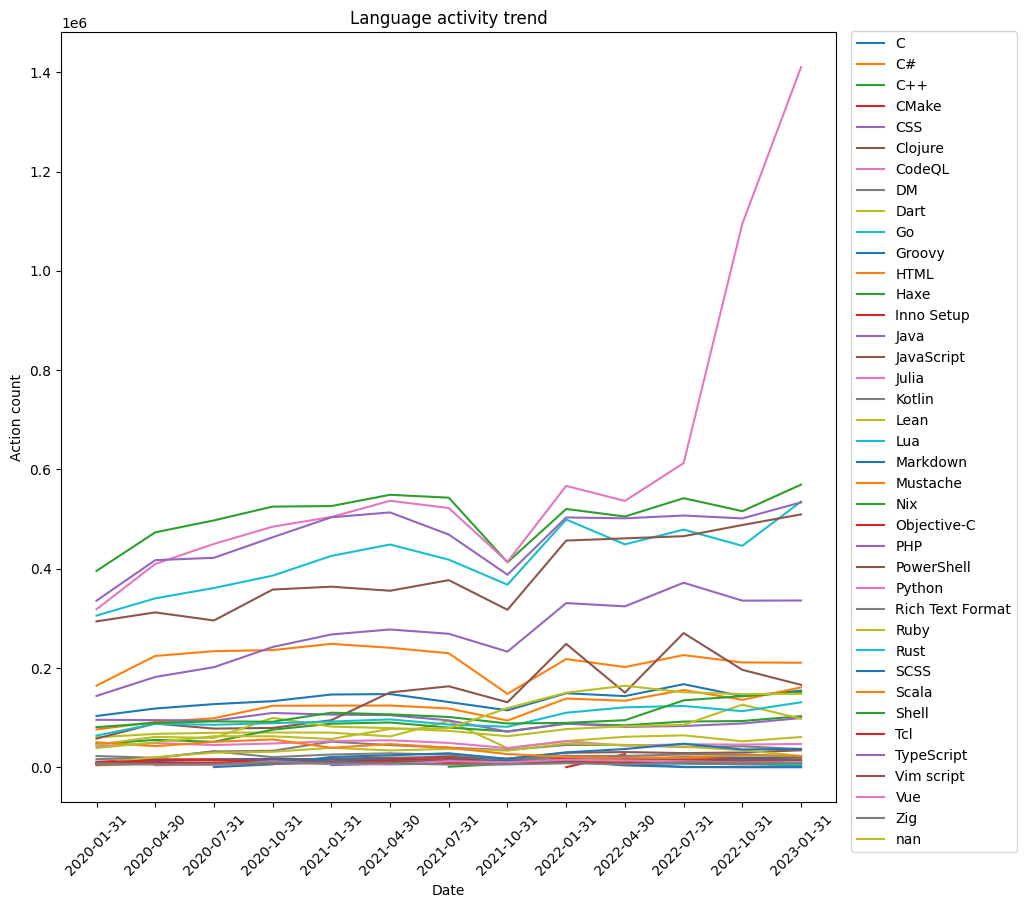

In [35]:
# ÁªòÂà∂ÊäòÁ∫øÂõæ
plt.figure(figsize=(10, 10))

# ÈÅçÂéÜÊØè‰∏™ÂàóÂêçÔºåÁªòÂà∂ÂØπÂ∫îÁöÑÊäòÁ∫øÂõæ
for column in activity_df.columns:
    plt.plot(activity_df.index, activity_df[column], label=column)

plt.xlabel('Date')
plt.ylabel('Action count')
plt.title('Language activity trend')
plt.legend()
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.01, 1.01), loc='upper left')

plt.show()

In [44]:
import json

# ËØªÂèñÊï∞ÊçÆÊñá‰ª∂
with open('E:\\tmp\\top_300_metrics\\top_300_metrics\\NixOS\\nixpkgs\\activity_details.json', 'r') as f:
    data = json.load(f)

# ÂàùÂßãÂåñÁî®Êà∑Ê¥ªË∑ÉÂ∫¶Â≠óÂÖ∏
user_activity = {}

# ËÆ°ÁÆóÊØè‰∏™Áî®Êà∑ÁöÑÊÄªÊ¥ªË∑ÉÂ∫¶
for date, activity_list in data.items():
    for user, score in activity_list:
        if user not in user_activity:
            user_activity[user] = 0
        user_activity[user] += score

# ÊéíÂ∫èÁî®Êà∑Ê¥ªË∑ÉÂ∫¶Â≠óÂÖ∏ÔºåÈÄâÂèñÂâçÂçÅÂêçÁî®Êà∑
top_users = sorted(user_activity.items(), key=lambda x: x[1], reverse=True)[:10]
max_username_length = max(len(user) for user, _ in top_users)+4

# ÊâìÂç∞ÊÄªÊ¥ªË∑ÉÂ∫¶ÂâçÂçÅÁöÑÁî®Êà∑
print("ÊÄªÊ¥ªË∑ÉÂ∫¶ÂâçÂçÅÁöÑÁî®Êà∑Ôºö")
for user, score in top_users:
    print(f"{user:<{max_username_length}}:{score:<10.2f}")  # Â∑¶ÂØπÈΩêËæìÂá∫Áî®Êà∑ÂêçÂíåÊ¥ªË∑ÉÂ∫¶ÂàÜÊï∞Ôºå‰øùÁïô‰∏§‰ΩçÂ∞èÊï∞

ÊÄªÊ¥ªË∑ÉÂ∫¶ÂâçÂçÅÁöÑÁî®Êà∑Ôºö
r-ryantm           :3250.01   
SuperSandro2000    :1927.32   
Mic92              :1680.43   
jtojnar            :1432.50   
FRidh              :1392.27   
vcunat             :1291.26   
fabaff             :1129.88   
dotlambda          :1072.51   
jonringer          :1059.40   
vbgl               :989.85    
